# Segmantion


In [7]:
import fastai
import torch

In [13]:
from fastai.vision.all import *
import numpy as np
path=untar_data(URLs.CAMVID_TINY)
path.ls()
#label getter function
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'
dls=SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),
                                            label_func=label_getter,
                                            codes=np.loadtxt(path/'codes.txt',dtype=str))  

learn=unet_learner(dls,resnet34)
learn.fine_tune(14)

epoch,train_loss,valid_loss,time
0,2.824211,2.513302,00:01


epoch,train_loss,valid_loss,time
0,2.027339,1.823384,00:01
1,1.725882,1.437708,00:01
2,1.508378,1.181128,00:01
3,1.349747,0.921002,00:01
4,1.237971,0.877108,00:01
5,1.124294,0.808517,00:01
6,1.018275,0.700684,00:01
7,0.927243,0.679361,00:01
8,0.848185,0.698822,00:01
9,0.783086,0.668594,00:01


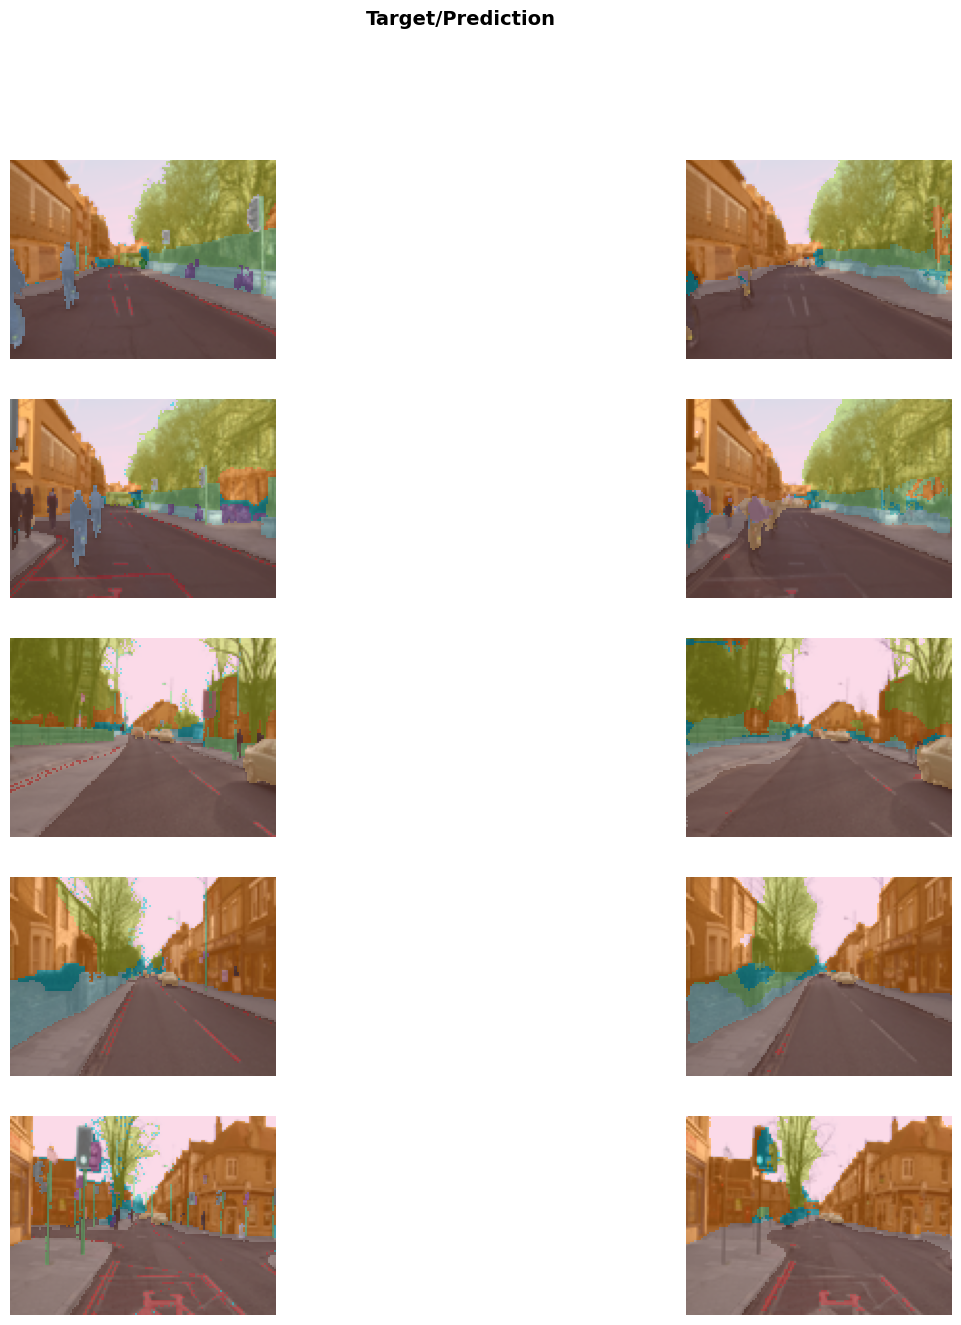

In [14]:
learn.show_results(max_n=5,figsize=(16,15))